# Gamelog

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colnames=["gamerID", "gameID", "nr.number", "THEpolygon.vertex_count",
          "THEpolygon.position_x", "THEpolygon.position_y", "THEpolygon.color[0]",
          "THEpolygon.color[1]", "THEpolygon.color[2]", "THEpolygon.radius", "seconds"] 
gamelog = pd.read_csv('gamelog.csv', names=colnames, header=None)

In [3]:
gamelog['dif']=gamelog['nr.number']-gamelog['THEpolygon.vertex_count']
gamelog['difAbs'] = gamelog['dif'].abs()
gamelog['correct'] = 0
gamelog.loc[gamelog['dif'] == 0, 'correct'] = 1

In [4]:
gamelog['color_list']= gamelog[['THEpolygon.color[0]','THEpolygon.color[1]','THEpolygon.color[2]']].values.tolist()

In [5]:
conditions = [
    (gamelog['color_list'].map(tuple).isin([(255, 102, 102)])),
    (gamelog['color_list'].map(tuple).isin([(102,255,102)])),
    (gamelog['color_list'].map(tuple).isin([(102,102,255)])),
    (gamelog['color_list'].map(tuple).isin([(255,255,102)])),
    (gamelog['color_list'].map(tuple).isin([(102,255,255)])),
    (gamelog['color_list'].map(tuple).isin([(255,178,102)])),
    (gamelog['color_list'].map(tuple).isin([(255,102,178)])),
    (gamelog['color_list'].map(tuple).isin([(178,102,255)]))]
choices = ['red', 'green', 'blue', 'yellow', 'teal', 'orange', 'pink', 'purple']
gamelog['color'] = np.select(conditions, choices, default='white')

In [6]:
gamelog['delta'] = (gamelog['seconds']-gamelog['seconds'].shift()).fillna(0)
gamelog.loc[gamelog['delta']<=0, 'delta'] = gamelog['seconds']

In [7]:
gamelog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,correct,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,1,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,0,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,0,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,1,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,1,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,1141.496,0,0,1,"[255, 255, 102]",yellow,2.150
2031,2558195,8987311,8,9,1564,248,255,102,178,93,1149.321,-1,1,0,"[255, 102, 178]",pink,7.825
2032,2558195,8987311,4,4,1563,350,102,255,102,123,1152.347,0,0,1,"[102, 255, 102]",green,3.026
2033,2558195,8987311,6,6,1413,715,102,102,255,58,1154.384,0,0,1,"[102, 102, 255]",blue,2.037


# Responses

In [8]:
Responses = pd.read_csv('Mindfullness_(Responses).csv')

In [9]:
Responses = Responses.replace('Men', 'male')
Responses = Responses.replace('Not at all', 0)
Responses = Responses.replace('A little', 1)
Responses = Responses.replace('Moderately', 2)
Responses = Responses.replace('Quite a bit', 3)
Responses = Responses.replace('Very much', 4)



In [10]:
for i in range(15):
    Responses.columns.values[i+5] = "S1Q" + str(i)
    Responses.columns.values[i+21] = "S2Q" + str(i)
    Responses["Q" + str(i)] = Responses[Responses.columns.values[i+21]].astype(int)-Responses[Responses.columns.values[i+5]].astype(int)


In [11]:
Responses.select_dtypes(include='number').mean().round(2)

Age                        25.67
S1Q0                        1.67
S1Q1                        1.00
S1Q2                        2.11
S1Q3                        0.89
S1Q4                        1.22
S1Q5                        1.56
S1Q6                        1.00
S1Q7                        1.78
S1Q8                        1.67
S1Q9                        0.89
S1Q10                       2.00
S1Q11                       2.11
S1Q12                       1.78
S1Q13                       1.67
S1Q14                       0.78
Player ID             4297338.22
S2Q0                        1.78
S2Q1                        1.44
S2Q2                        2.67
S2Q3                        1.78
S2Q4                        1.89
S2Q5                        2.56
S2Q6                        1.78
S2Q7                        2.33
S2Q8                        2.44
S2Q9                        1.78
S2Q10                       2.78
S2Q11                       2.44
S2Q12                       1.67
S2Q13     

In [57]:
Responses['S1mean'] = Responses.iloc[:, 5:20].mean(axis=1).round(2)
Responses['S2mean'] = Responses.iloc[:, 21:36].mean(axis=1).round(2)
Responses['Qdif'] = Responses.iloc[:, 37:52].mean(axis=1).round(2)

In [59]:
Responses

,Timestamp,Age,Sex,Do you meditate?,Have you ever had depression or anxiety as a person?,S1Q0,S1Q1,S1Q2,S1Q3,S1Q4,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,S1mean,S2mean,Qdif
0,22/01/2022 16:48:48,24,male,No,Yes,1,1,0,0,1,...,3,2,2,1,1,3,3,1.40,4.00,2.60
1,22/01/2022 18:05:28,27,female,No,Yes,1,1,4,0,1,...,3,3,1,0,1,1,1,1.80,3.13,1.33
2,22/01/2022 20:02:05,23,male,No,Yes,4,2,4,2,4,...,-1,-3,0,0,-3,-2,-1,2.73,1.27,-1.47
3,22/01/2022 20:51:51,24,male,No,Yes,1,2,1,1,2,...,2,3,2,2,2,0,4,1.53,3.53,2.00
4,22/01/2022 21:16:29,23,female,No,No,1,0,1,0,0,...,1,1,1,2,1,1,0,0.20,0.87,0.67
5,23/01/2022 14:33:24,29,male,No,No,2,1,3,2,1,...,0,0,1,-1,-1,0,1,1.93,2.07,0.13
6,23/01/2022 15:25:59,26,female,No,No,1,0,1,1,1,...,2,3,1,1,1,2,3,0.60,2.07,1.47
7,23/01/2022 15:31:50,26,female,No,Yes,1,1,2,0,0,...,-1,0,-1,-3,0,0,0,0.73,0.53,-0.20
8,24/01/2022 00:32:19,29,female,No,Yes,3,1,3,2,1,...,-2,-1,0,1,-3,-1,-3,2.33,1.20,-1.13


In [58]:
Responses.columns.to_frame().reset_index()

,index,0
0,Timestamp,Timestamp
1,Age,Age
2,Sex,Sex
3,Do you meditate?,Do you meditate?
4,Have you ever had depression or anxiety as a p...,Have you ever had depression or anxiety as a p...
5,S1Q0,S1Q0
6,S1Q1,S1Q1
7,S1Q2,S1Q2
8,S1Q3,S1Q3
9,S1Q4,S1Q4


In [60]:
Responses[['Player ID','S1mean','S2mean','Qdif']]

,Player ID,S1mean,S2mean,Qdif
0,5555,1.40,4.00,2.60
1,2189773,1.80,3.13,1.33
2,7226659,2.73,1.27,-1.47
3,1685637,1.53,3.53,2.00
4,6092123,0.20,0.87,0.67
5,9274304,1.93,2.07,0.13
6,8714568,0.60,2.07,1.47
7,929230,0.73,0.53,-0.20
8,2558195,2.33,1.20,-1.13


## Clean data

In [12]:
list(set(gamelog['gamerID'].unique()).intersection(Responses['Player ID'].unique()))

[9274304, 7226659, 1685637, 8714568, 2189773, 929230, 2558195, 6092123]

In [13]:
Responses['Player ID'].unique()

array([   5555, 2189773, 7226659, 1685637, 6092123, 9274304, 8714568,
        929230, 2558195], dtype=int64)

In [14]:
gamelog['gamerID'].unique()

array([2189773, 7226659, 4705656, 6092123, 9282881, 9274304, 8714568,
        929230, 1685637, 3592917, 2558195], dtype=int64)

In [15]:
gamelog.join(Responses.set_index('Player ID'), on='gamerID')

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,...,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14
0,2189773,5576994,9,9,269,312,255,255,255,100,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
1,2189773,5576994,7,6,1761,227,102,102,255,101,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
2,2189773,5576994,8,7,1571,789,255,178,102,87,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
3,2189773,5576994,8,8,181,200,102,255,102,134,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
4,2189773,5576994,6,6,1478,589,255,102,178,89,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,...,0.0,-2.0,0.0,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0
2031,2558195,8987311,8,9,1564,248,255,102,178,93,...,0.0,-2.0,0.0,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0
2032,2558195,8987311,4,4,1563,350,102,255,102,123,...,0.0,-2.0,0.0,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0
2033,2558195,8987311,6,6,1413,715,102,102,255,58,...,0.0,-2.0,0.0,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0


In [16]:
cleanLog= gamelog[gamelog['gamerID'].isin(Responses['Player ID'].unique().tolist())]

In [17]:
cleanLog = cleanLog[~cleanLog['gameID'].isin(cleanLog.groupby('gameID')['dif'].value_counts().unstack(fill_value=0)[cleanLog.groupby('gameID')['dif'].value_counts().unstack(fill_value=0)[0]==0].index.tolist())]

In [18]:
cleanLog = cleanLog[~cleanLog['gameID'].isin(cleanLog.groupby('gameID').count()['delta'][cleanLog.groupby('gameID').count()['delta']<3].index.tolist())]

In [19]:
Responses['Player ID'].unique().tolist()

[5555, 2189773, 7226659, 1685637, 6092123, 9274304, 8714568, 929230, 2558195]

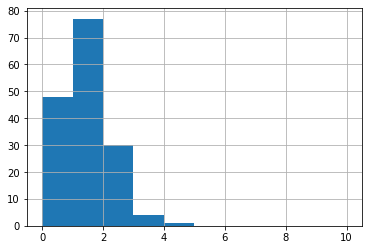

In [20]:
cleanLog.groupby('gameID').max()['dif'].hist(range=[0, 10])

In [21]:
cleanLog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,correct,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,1,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,0,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,0,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,1,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,1,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,1141.496,0,0,1,"[255, 255, 102]",yellow,2.150
2031,2558195,8987311,8,9,1564,248,255,102,178,93,1149.321,-1,1,0,"[255, 102, 178]",pink,7.825
2032,2558195,8987311,4,4,1563,350,102,255,102,123,1152.347,0,0,1,"[102, 255, 102]",green,3.026
2033,2558195,8987311,6,6,1413,715,102,102,255,58,1154.384,0,0,1,"[102, 102, 255]",blue,2.037


# Errors distributions

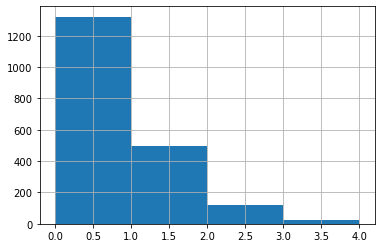

In [22]:
cleanLog['difAbs'].hist(bins =4)

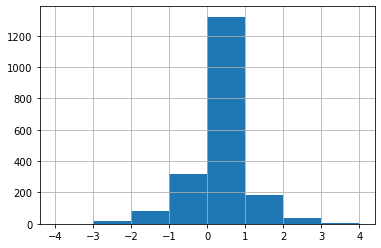

In [23]:
cleanLog['dif'].hist(bins =8)

(array([  0.,   8.,  33., 170.,  23.,   4.,   0.,   0.]),
 array([-3.   , -2.125, -1.25 , -0.375,  0.5  ,  1.375,  2.25 ,  3.125,
         4.   ]),
 <a list of 8 Patch objects>)

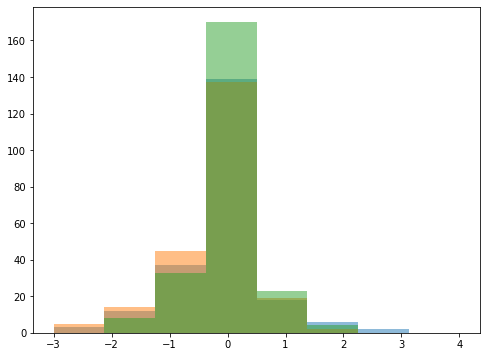

In [24]:
plt.figure(figsize=(8,6))
plt.hist(cleanLog[cleanLog['color']=='red']['dif'], bins=8, alpha=0.5, label="red",range=[-3, 4])
plt.hist(cleanLog[cleanLog['color']=='blue']['dif'], bins=8, alpha=0.5, label="blue",range=[-3, 4])
plt.hist(cleanLog[cleanLog['color']=='green']['dif'], bins=8, alpha=0.5, label="green",range=[-3, 4])

In [25]:
#cleanLog[(cleanLog['color']==c)&(cleanLog['nr.number']==3)]['dif']

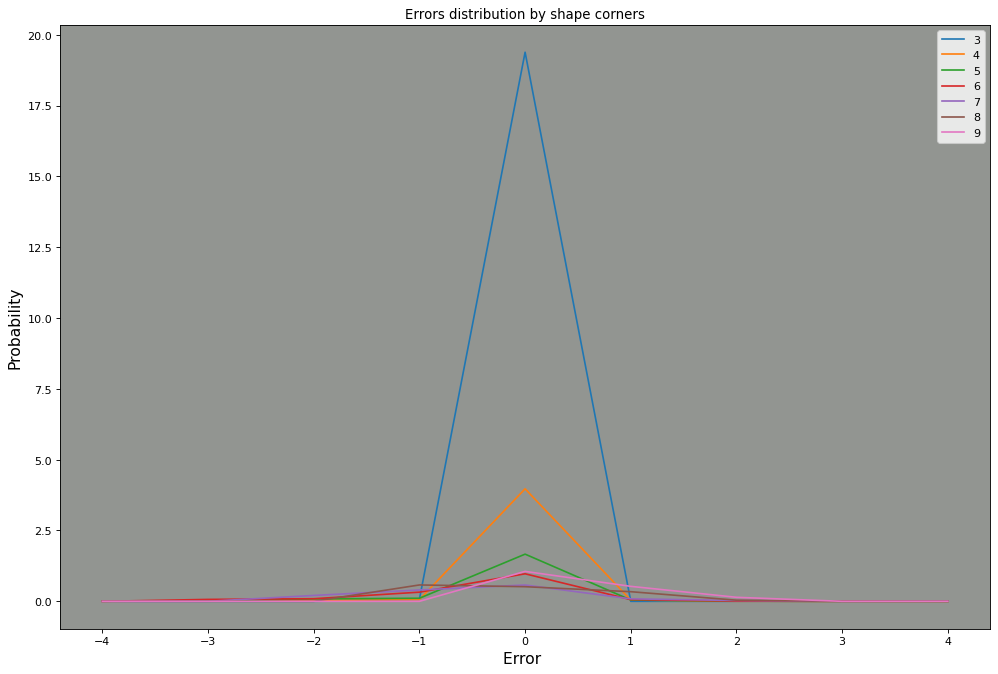

In [26]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(15, 10), dpi=80)
Nlist = cleanLog['THEpolygon.vertex_count'].unique().tolist()
Nlist.sort()
for c in Nlist:
    data = cleanLog[cleanLog['nr.number']==c]['dif']
    kde = gaussian_kde( data )
    dist_space = linspace( -4,4, 9 )
    plt.plot( dist_space, kde(dist_space),  label=c)
    #plt.yscale('log')
    ax = plt.gca()
    ax.set_facecolor('xkcd:grey')
plt.xlabel("Error ", size=14)
plt.ylabel("Probability", size=14)
plt.title("Errors distribution by shape corners")
plt.legend(loc='upper right')
plt.show()

# Games stats

In [27]:
kde(dist_space)

array([8.17136541e-66, 2.50389475e-37, 5.57171029e-17, 9.00351308e-05,
       1.05658635e+00, 5.28372821e-01, 1.42271735e-01, 1.21201138e-05,
       7.50037923e-18])

In [28]:
dist_space

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


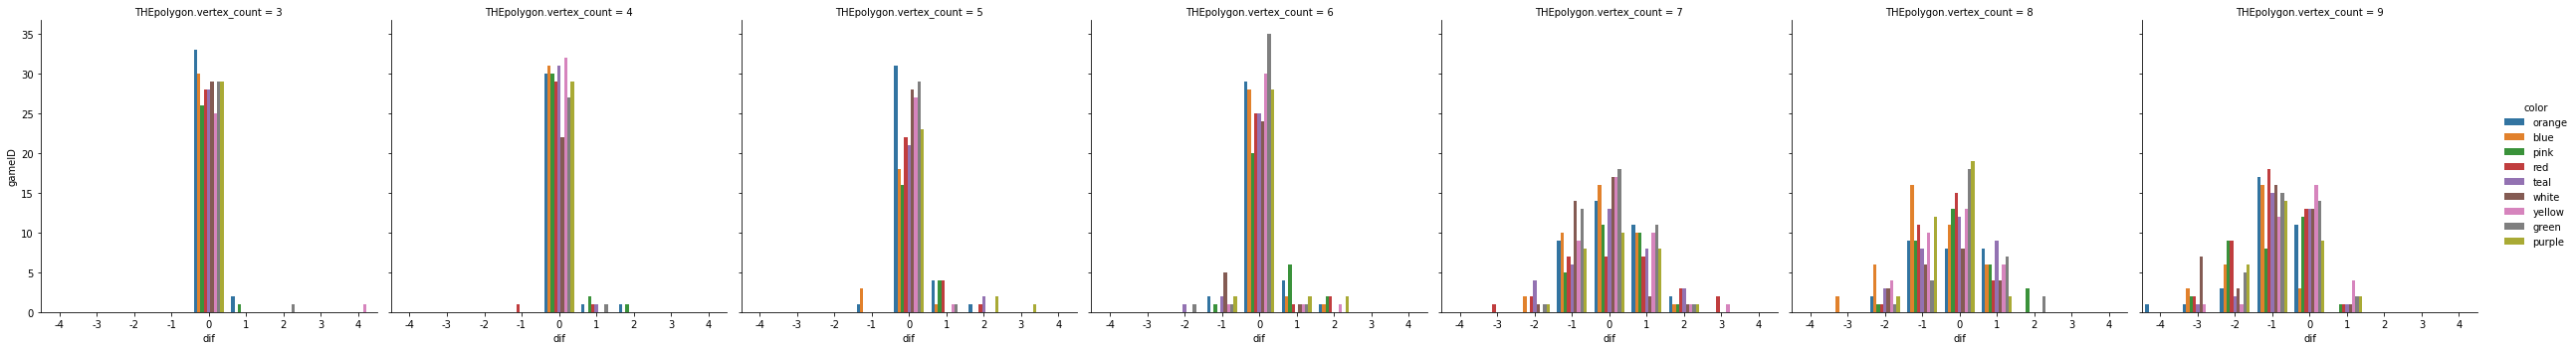

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df =  cleanLog.groupby(['dif','color','THEpolygon.vertex_count']).count().reset_index()

sns.factorplot(x="dif", y="gameID", hue="color", col="THEpolygon.vertex_count", data=df, kind="bar")
plt.show()

In [32]:
correctmatrix= cleanLog.groupby(['correct','color','THEpolygon.vertex_count']).agg(count=pd.NamedAgg(column="color", aggfunc="count")).unstack('correct').fillna(0)
correctmatrix['percent']=(correctmatrix[('count',  1)]/(correctmatrix[('count', 0)]+correctmatrix[('count',  1)])).round(2)
correctmatrix2 = correctmatrix['percent'].to_frame().unstack().droplevel(0,1)
correctmatrix2.columns= correctmatrix2.columns.rename('vertex count')
correctmatrix2

vertex count,3,4,5,6,7,8,9
color,,,,,,,
blue,1.00,1.00,0.82,0.90,0.41,0.27,0.11
green,0.97,0.96,0.97,0.92,0.41,0.56,0.39
orange,0.94,0.94,0.84,0.81,0.39,0.30,0.33
pink,0.96,0.91,0.80,0.69,0.41,0.41,0.38
purple,1.00,1.00,0.88,0.82,0.36,0.54,0.29
red,1.00,0.94,0.81,0.89,0.24,0.48,0.30
teal,1.00,0.97,0.91,0.89,0.38,0.38,0.41
white,1.00,1.00,1.00,0.80,0.49,0.38,0.32
yellow,0.96,1.00,0.96,0.91,0.45,0.39,0.47


In [33]:
correctmatrix[('count', False)]

color   THEpolygon.vertex_count
blue    3                           0.0
        4                           0.0
        5                           4.0
        6                           3.0
        7                          23.0
                                   ... 
yellow  5                           1.0
        6                           3.0
        7                          21.0
        8                          20.0
        9                          18.0
Name: (count, 0), Length: 63, dtype: float64

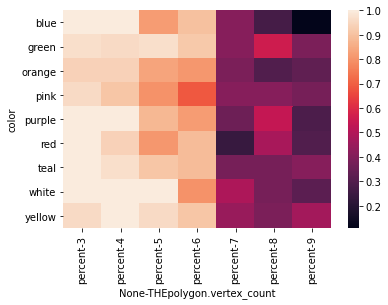

In [34]:
sns.heatmap(correctmatrix['percent'].to_frame().unstack())

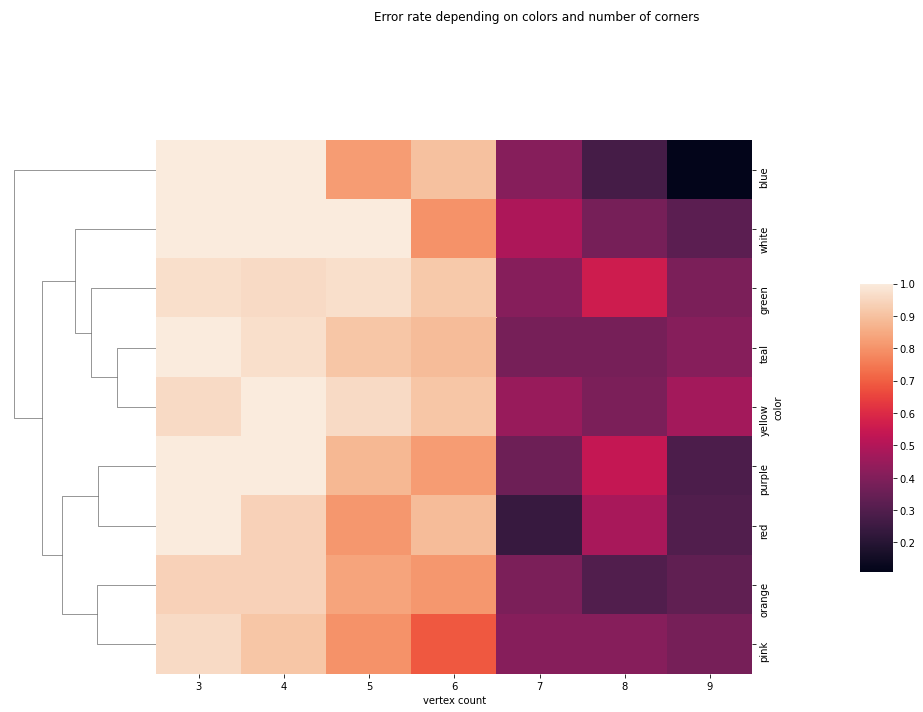

In [35]:
g=sns.clustermap(correctmatrix2,col_cluster=False,method="complete", figsize=(15,10))
g.fig.subplots_adjust(right=0.7)
g.fig.suptitle('Error rate depending on colors and number of corners')
g.ax_cbar.set_position((0.8, .2, .03, .4))

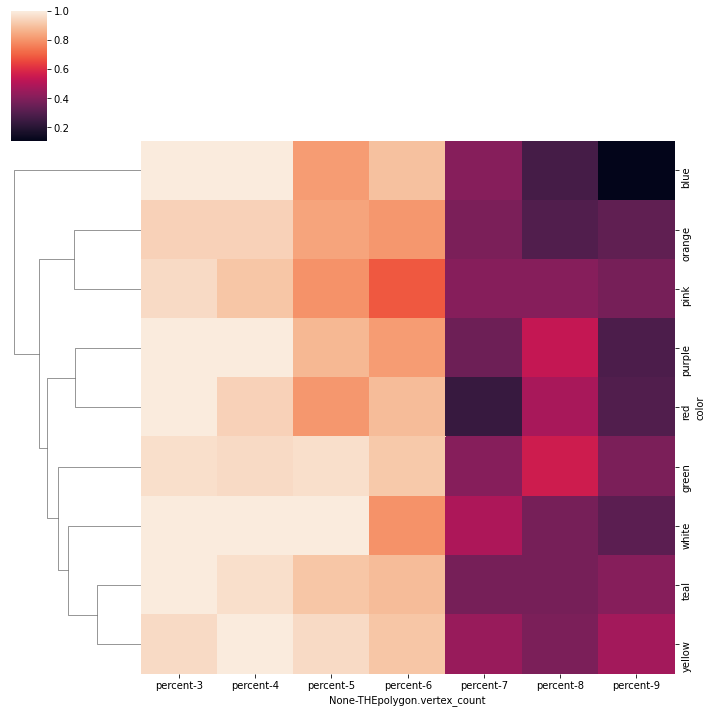

In [36]:
sns.clustermap(correctmatrix['percent'].to_frame().unstack(),col_cluster=False,method="weighted")

# Players stats

In [47]:
playerStat = cleanLog.groupby('gamerID').agg({'delta':['min','mean', 'median'],
                                 'dif':'mean',
                                 'difAbs':'mean',
                                 'THEpolygon.vertex_count': 'mean',
                                 'correct': ['sum','count',lambda x : x.sum()/x.count()]})
playerStat

delta                          dif    difAbs THEpolygon.vertex_count  \
           min       mean  median      mean      mean                    mean   
gamerID                                                                         
929230   0.118   4.302502  2.1450  0.004651  0.525581                6.181395   
1685637  0.106   1.892901  1.5940 -0.077922  0.363636                6.111688   
2189773  0.630   3.343271  2.0010 -0.046110  0.334294                6.337176   
2558195  1.285  12.885322  3.3400 -0.411111  0.588889                6.055556   
6092123  0.649   2.733988  2.2320 -0.138554  0.481928                5.972892   
7226659  0.630   2.558207  1.4040 -0.236957  0.380435                6.052174   
8714568  1.780  16.544250  5.5485 -0.346154  0.576923                6.096154   
9274304  1.037  13.585634  2.9610 -0.146341  0.317073                6.170732   

        correct                   
            sum count <lambda_0>  
gamerID                           
929230      132   215   0.613953  
1685637     269   385   0.698701  
2189773     248   347   0.714697  
2558195      53    90   0.588889  
6092123     210   332   0.632530  
7226659     314   460   0.682609  
8714568      31    52   0.596154  
9274304      64    82   0.780488

In [45]:
Responses

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,correct,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,1,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,0,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,0,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,1,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,1,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,1141.496,0,0,1,"[255, 255, 102]",yellow,2.150
2031,2558195,8987311,8,9,1564,248,255,102,178,93,1149.321,-1,1,0,"[255, 102, 178]",pink,7.825
2032,2558195,8987311,4,4,1563,350,102,255,102,123,1152.347,0,0,1,"[102, 255, 102]",green,3.026
2033,2558195,8987311,6,6,1413,715,102,102,255,58,1154.384,0,0,1,"[102, 102, 255]",blue,2.037


In [62]:
playerStat2 = playerStat.join(Responses.set_index('Player ID'))

In [65]:
playerStat2.select_dtypes(include='number')

,"(delta, min)","(delta, mean)","(delta, median)","(dif, mean)","(difAbs, mean)","(THEpolygon.vertex_count, mean)","(correct, sum)","(correct, count)","(correct, <lambda_0>)",Age,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,S1mean,S2mean,Qdif
gamerID,,,,,,,,,,,,,,,,,,,,,
929230,0.118,4.302502,2.1450,0.004651,0.525581,6.181395,132,215,0.613953,26,...,-1,0,-1,-3,0,0,0,0.73,0.53,-0.20
1685637,0.106,1.892901,1.5940,-0.077922,0.363636,6.111688,269,385,0.698701,24,...,2,3,2,2,2,0,4,1.53,3.53,2.00
2189773,0.630,3.343271,2.0010,-0.046110,0.334294,6.337176,248,347,0.714697,27,...,3,3,1,0,1,1,1,1.80,3.13,1.33
2558195,1.285,12.885322,3.3400,-0.411111,0.588889,6.055556,53,90,0.588889,29,...,-2,-1,0,1,-3,-1,-3,2.33,1.20,-1.13
6092123,0.649,2.733988,2.2320,-0.138554,0.481928,5.972892,210,332,0.632530,23,...,1,1,1,2,1,1,0,0.20,0.87,0.67
7226659,0.630,2.558207,1.4040,-0.236957,0.380435,6.052174,314,460,0.682609,23,...,-1,-3,0,0,-3,-2,-1,2.73,1.27,-1.47
8714568,1.780,16.544250,5.5485,-0.346154,0.576923,6.096154,31,52,0.596154,26,...,2,3,1,1,1,2,3,0.60,2.07,1.47
9274304,1.037,13.585634,2.9610,-0.146341,0.317073,6.170732,64,82,0.780488,29,...,0,0,1,-1,-1,0,1,1.93,2.07,0.13


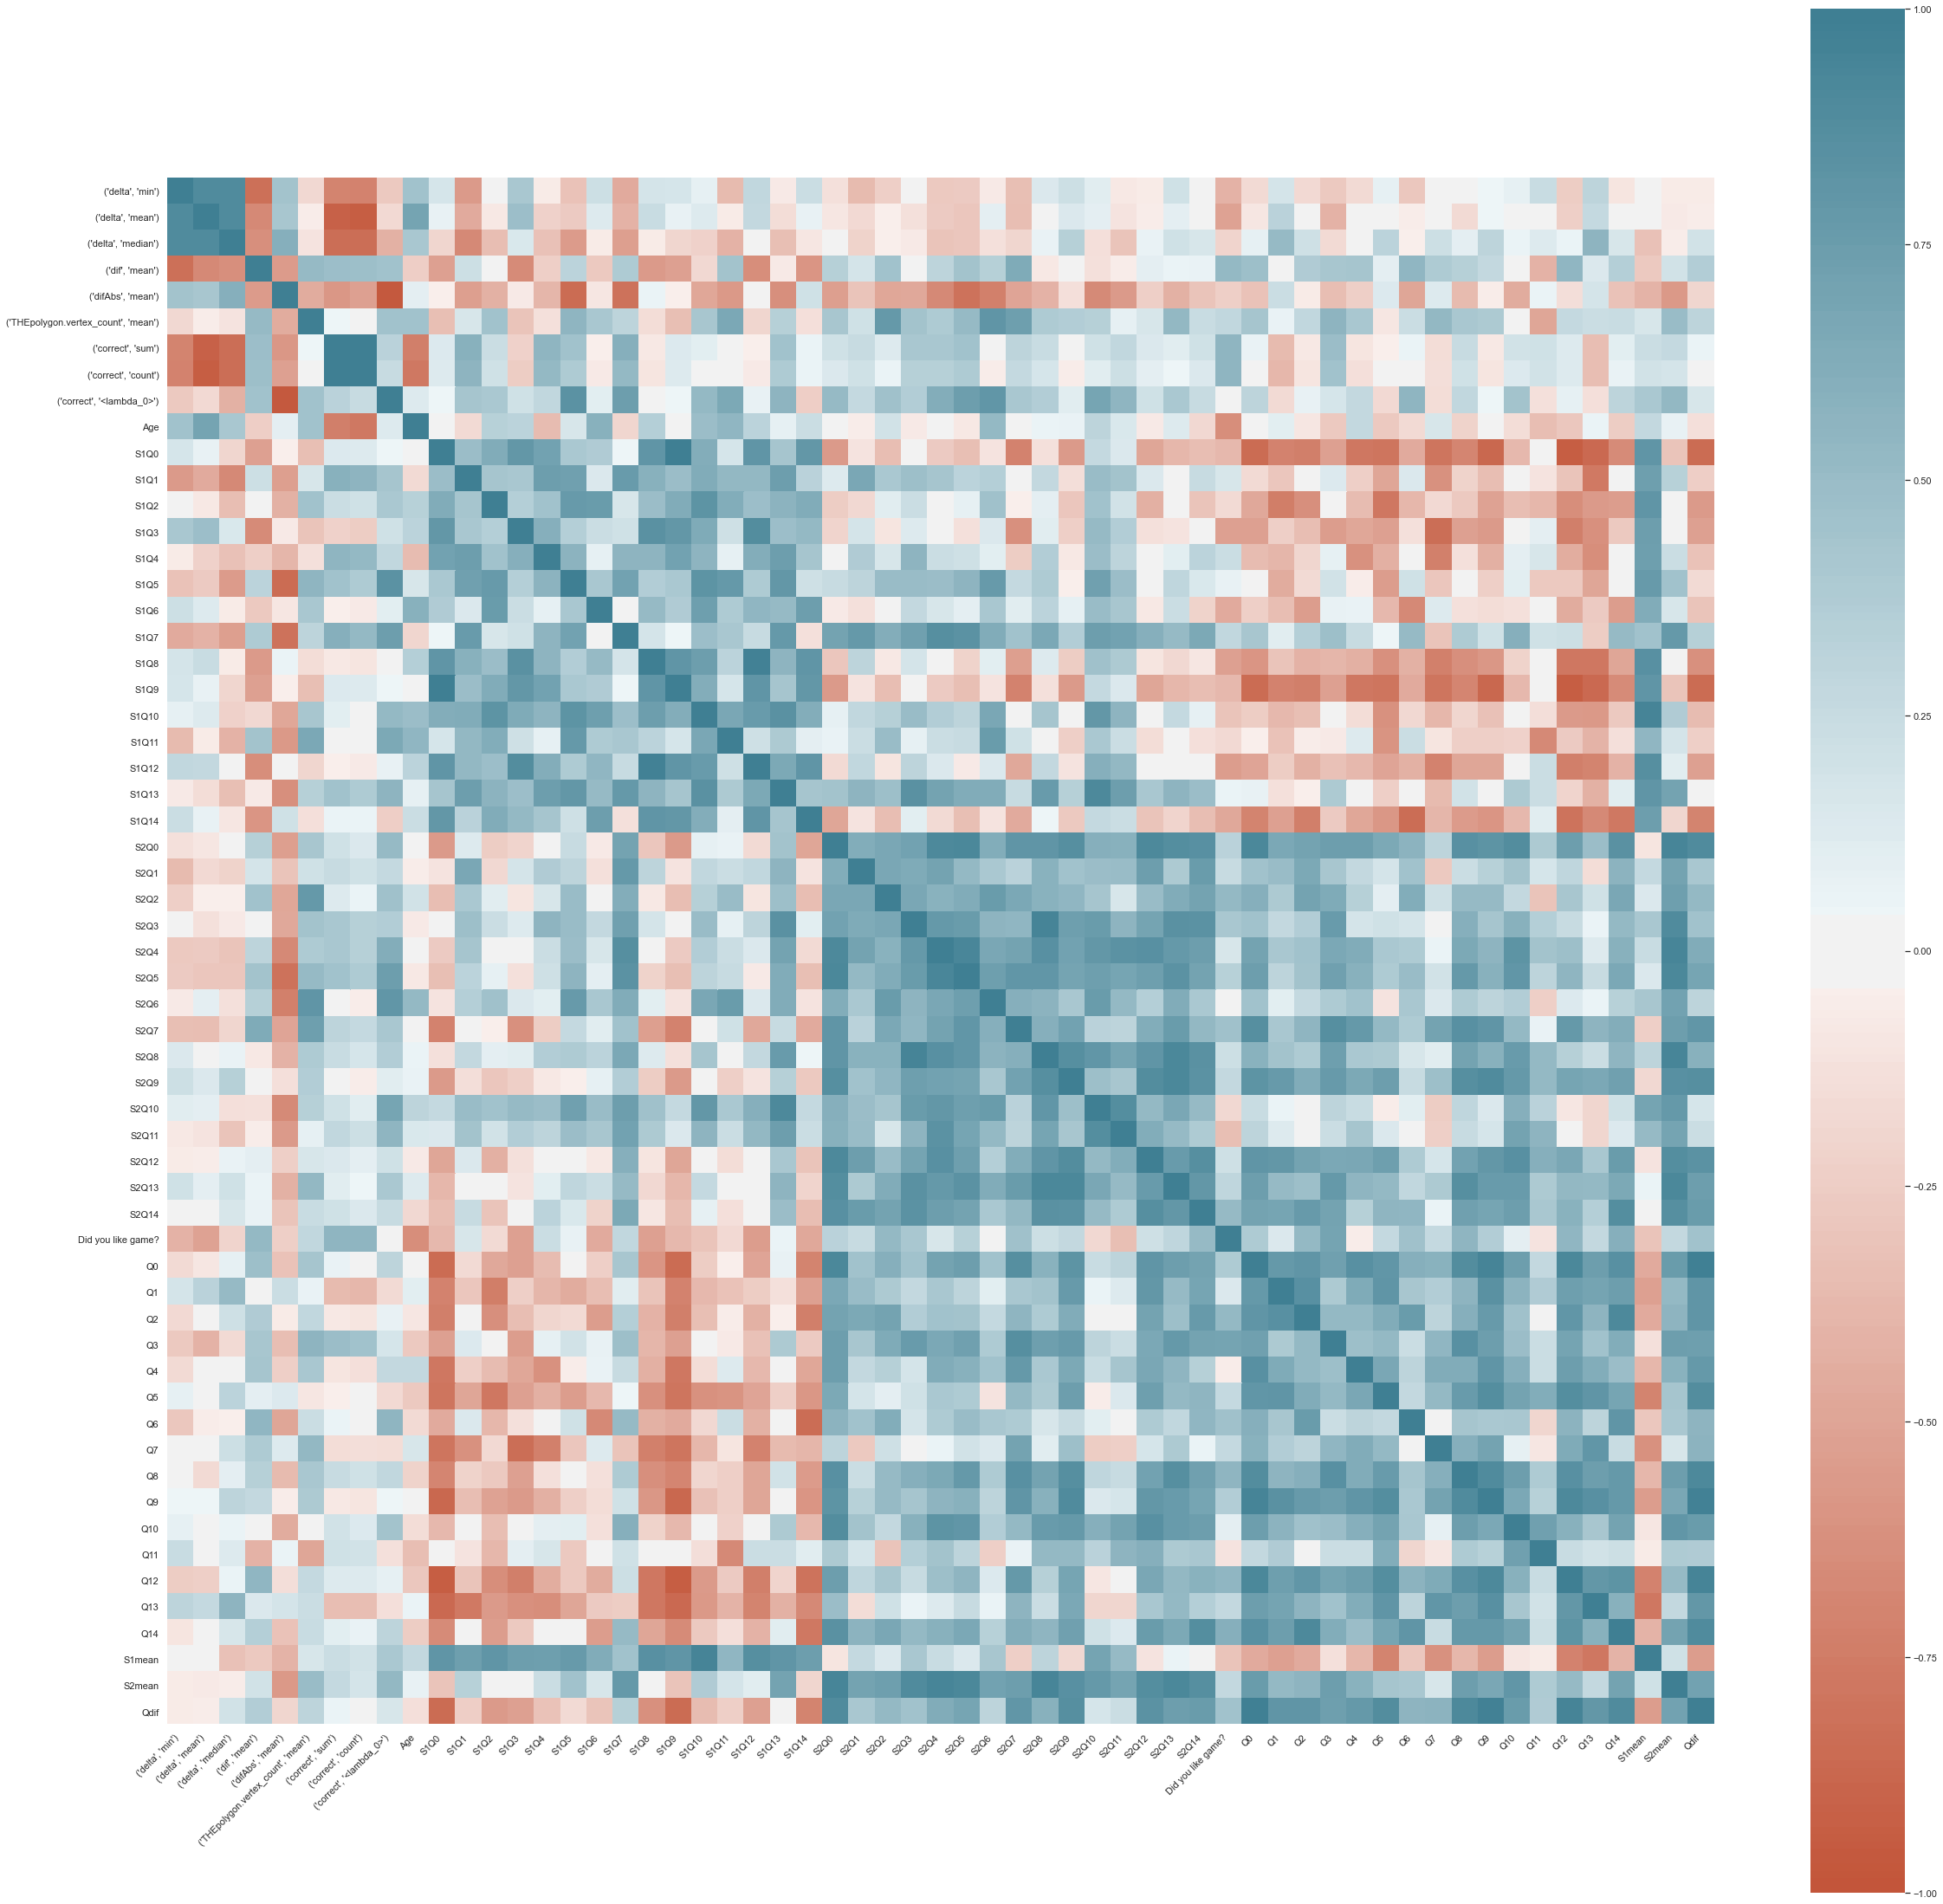

In [72]:
sns.set(rc = {'figure.figsize':(40,40)})

corr = playerStat2.select_dtypes(include='number').corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [76]:
playerStat3 = playerStat.join(Responses[['Player ID','Sex','S1mean','S2mean','Qdif','Q1','Q3','Q6','Q12','Q13']].set_index('Player ID'))
playerStat3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(delta, min)","(delta, mean)","(delta, median)","(dif, mean)","(difAbs, mean)","(THEpolygon.vertex_count, mean)","(correct, sum)","(correct, count)","(correct, <lambda_0>)",Sex,S1mean,S2mean,Qdif,Q1,Q3,Q6,Q12,Q13
gamerID,,,,,,,,,,,,,,,,,,
929230,0.118,4.302502,2.1450,0.004651,0.525581,6.181395,132,215,0.613953,female,0.73,0.53,-0.20,0,0,1,0,0
1685637,0.106,1.892901,1.5940,-0.077922,0.363636,6.111688,269,385,0.698701,male,1.53,3.53,2.00,1,2,2,2,0
2189773,0.630,3.343271,2.0010,-0.046110,0.334294,6.337176,248,347,0.714697,female,1.80,3.13,1.33,0,3,0,1,1
2558195,1.285,12.885322,3.3400,-0.411111,0.588889,6.055556,53,90,0.588889,female,2.33,1.20,-1.13,0,-1,-2,-3,-1
6092123,0.649,2.733988,2.2320,-0.138554,0.481928,5.972892,210,332,0.632530,female,0.20,0.87,0.67,0,0,0,1,1
7226659,0.630,2.558207,1.4040,-0.236957,0.380435,6.052174,314,460,0.682609,male,2.73,1.27,-1.47,-1,0,0,-3,-2
8714568,1.780,16.544250,5.5485,-0.346154,0.576923,6.096154,31,52,0.596154,female,0.60,2.07,1.47,1,1,1,1,2
9274304,1.037,13.585634,2.9610,-0.146341,0.317073,6.170732,64,82,0.780488,male,1.93,2.07,0.13,0,-1,2,-1,0


In [84]:
playerStat3.columns[8]

('correct', '<lambda_0>')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029813BAAC70>,
      dtype=object)

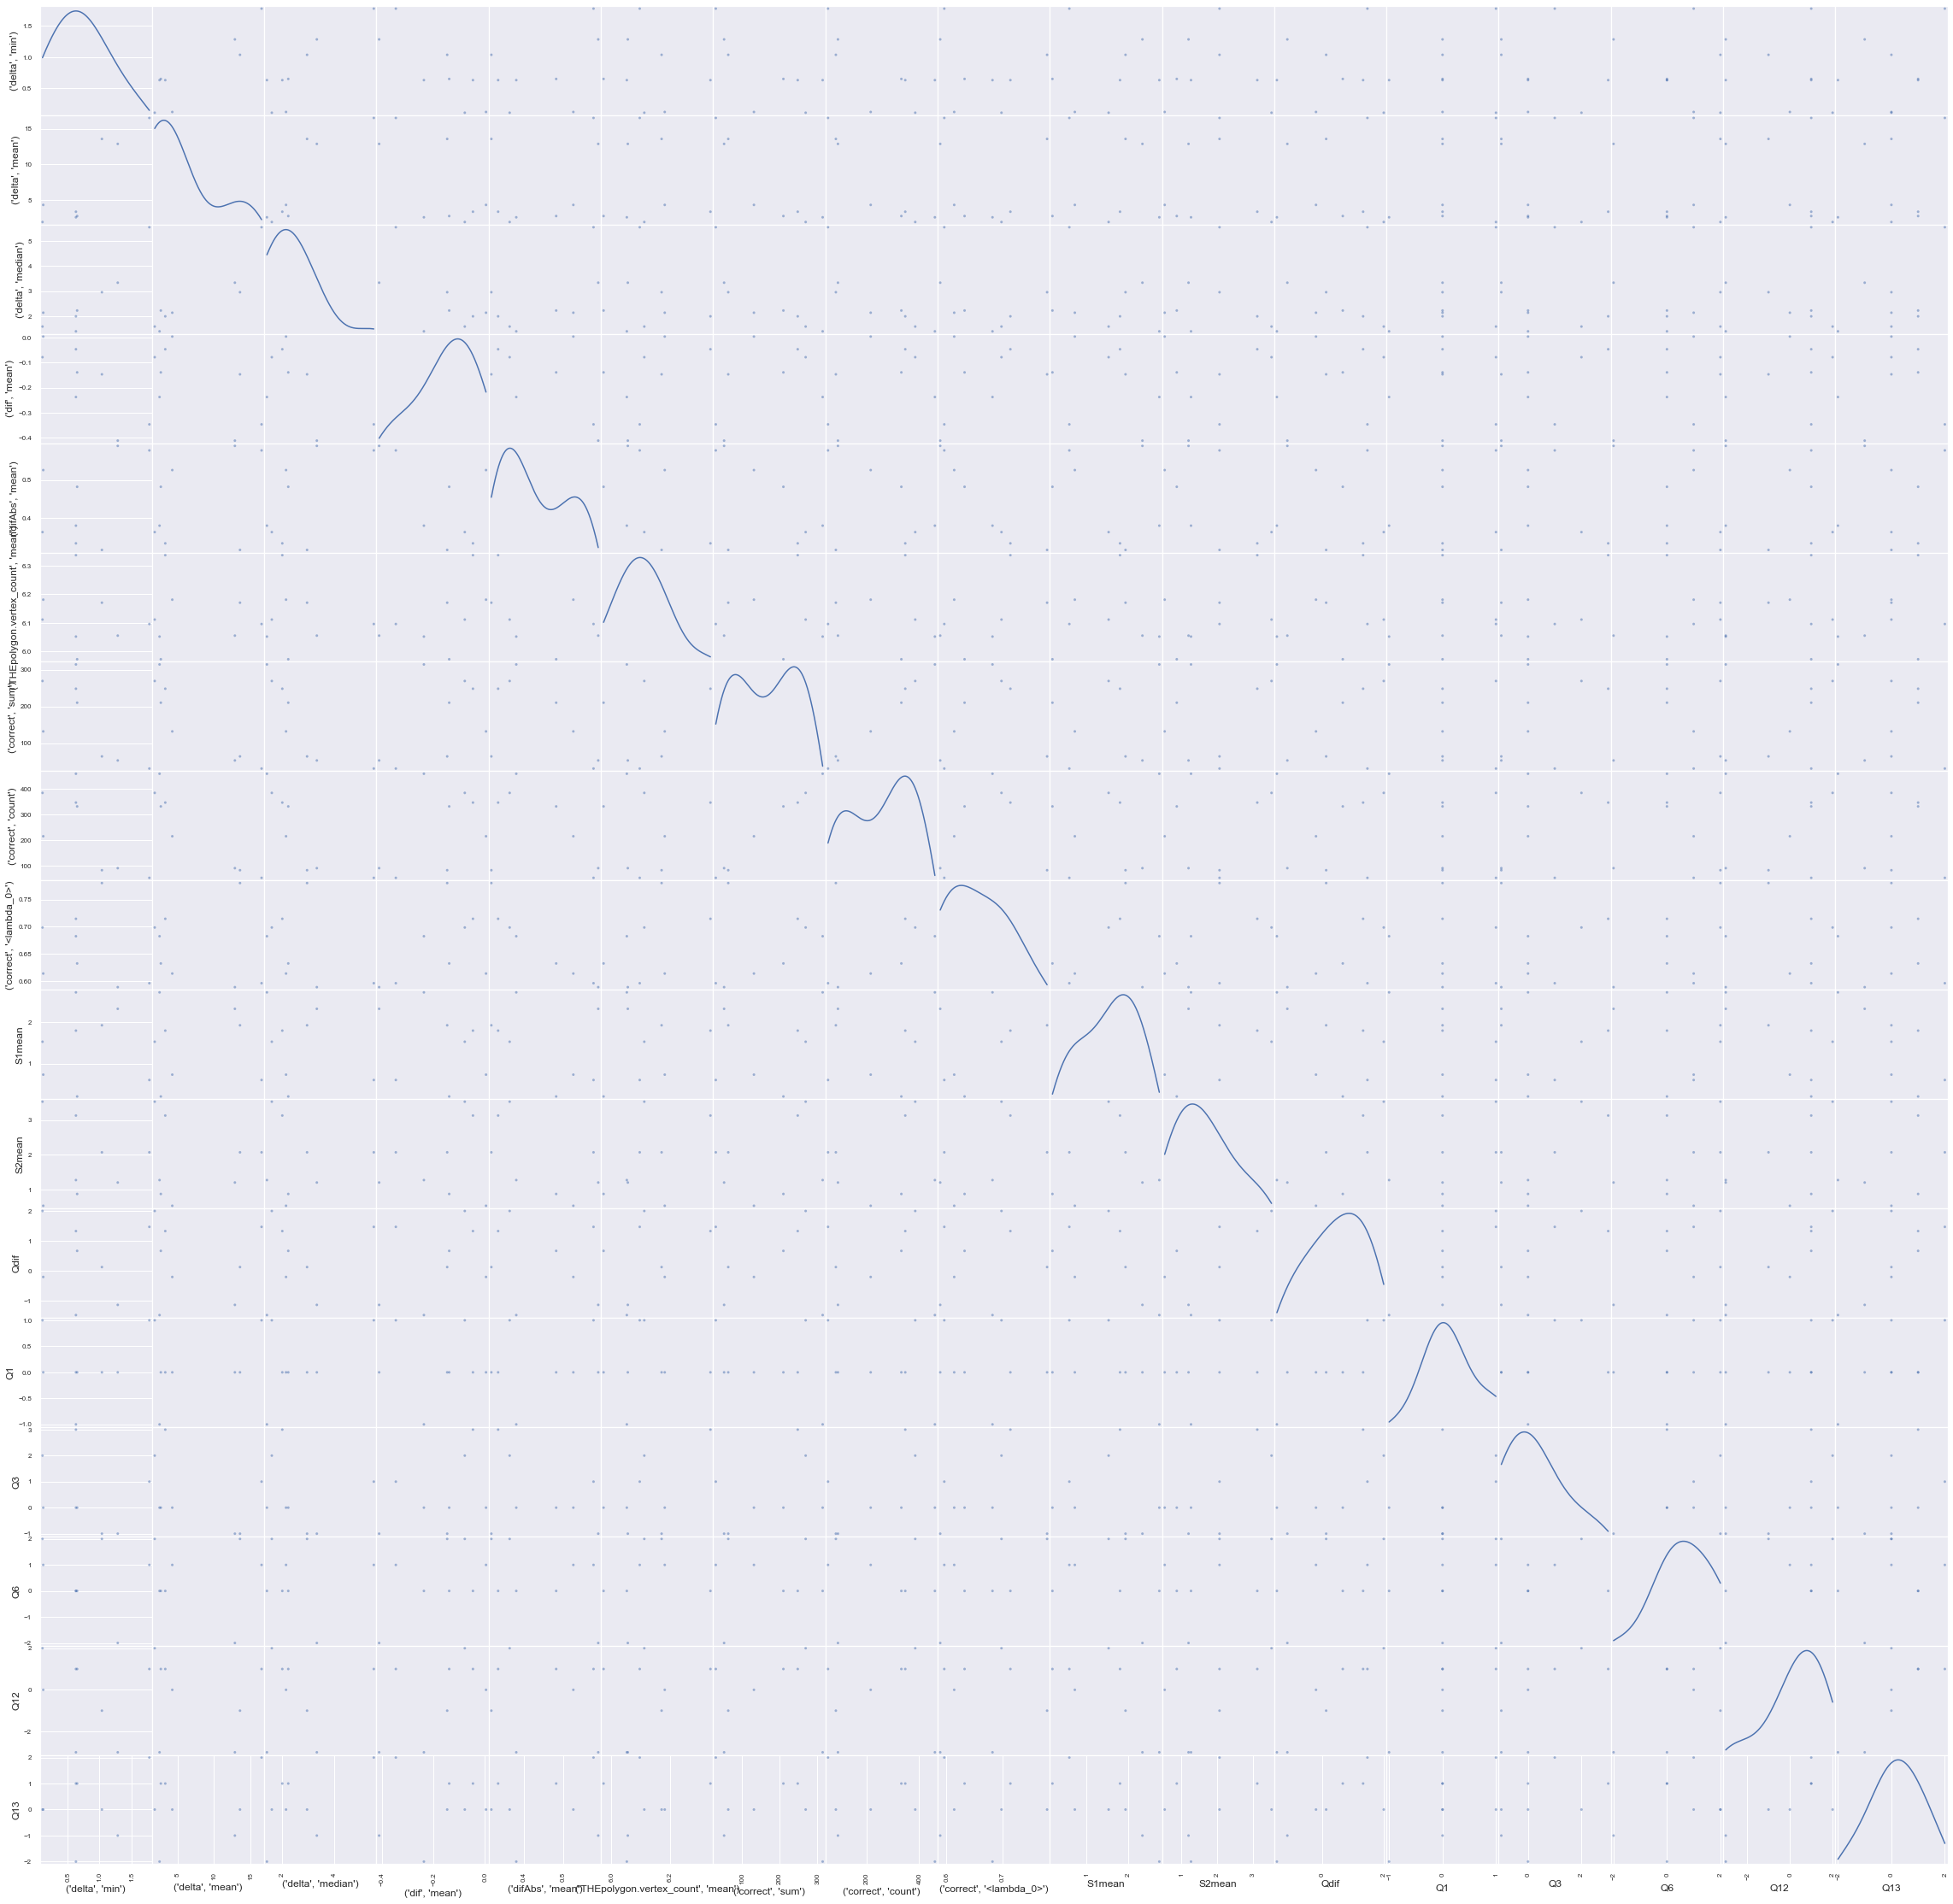

In [74]:
pd.plotting.scatter_matrix(playerStat3, diagonal='kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


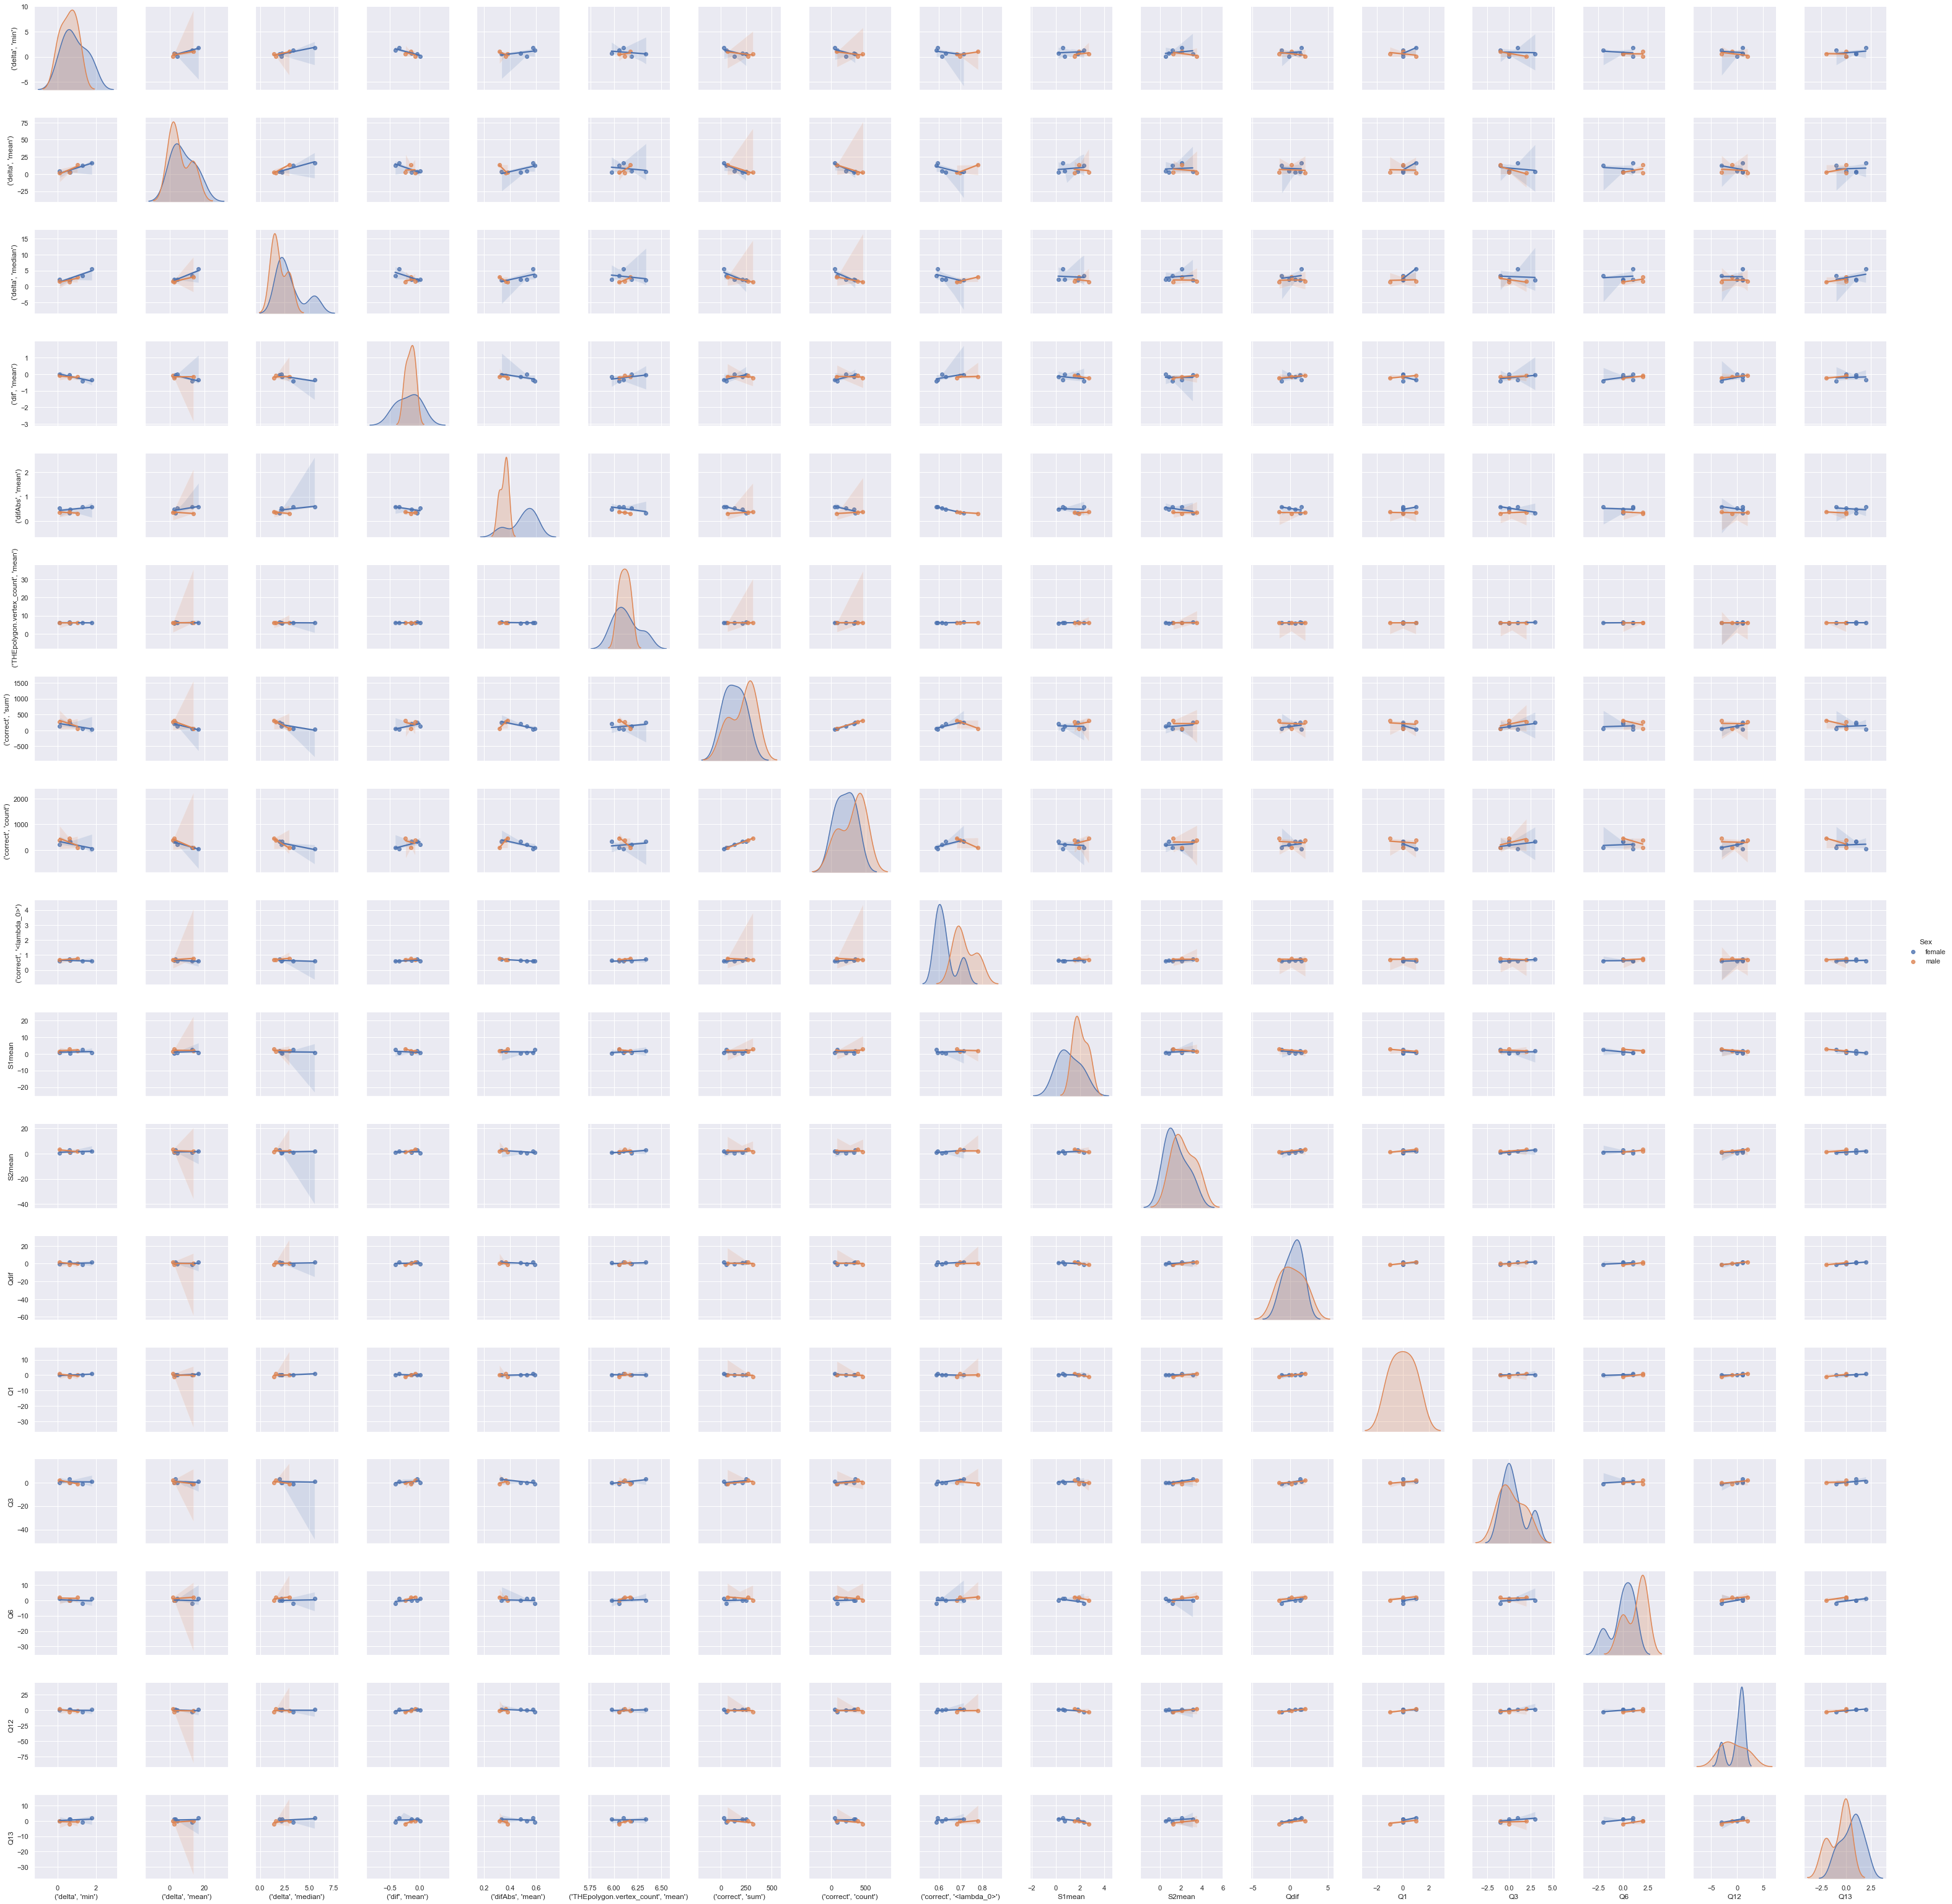

In [79]:
sns.pairplot(playerStat3, kind='reg', hue='Sex') 

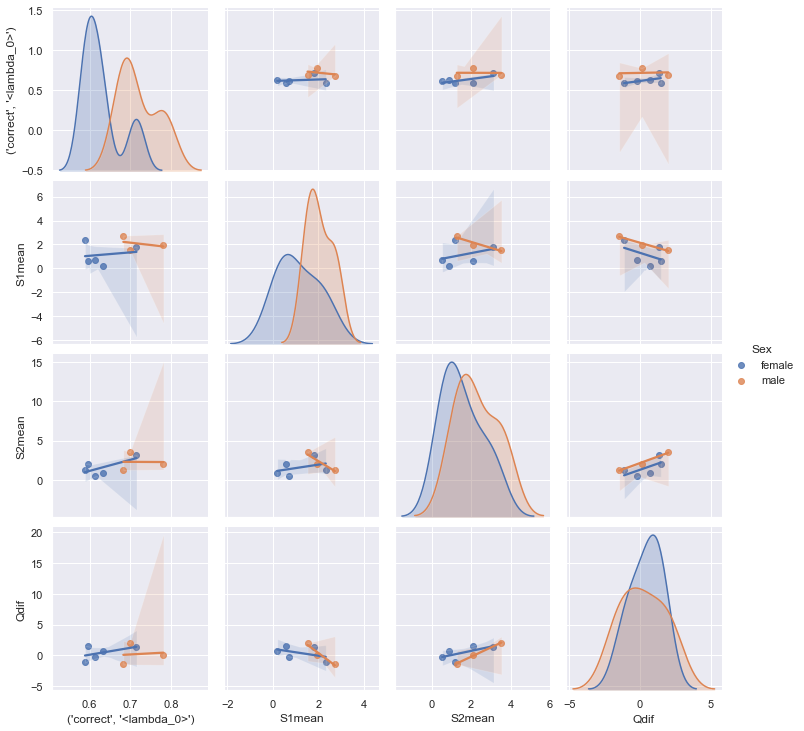

In [85]:
sns.pairplot(playerStat3, vars=[playerStat3.columns[8], 'S1mean', 'S2mean','Qdif'], kind='reg', hue='Sex')

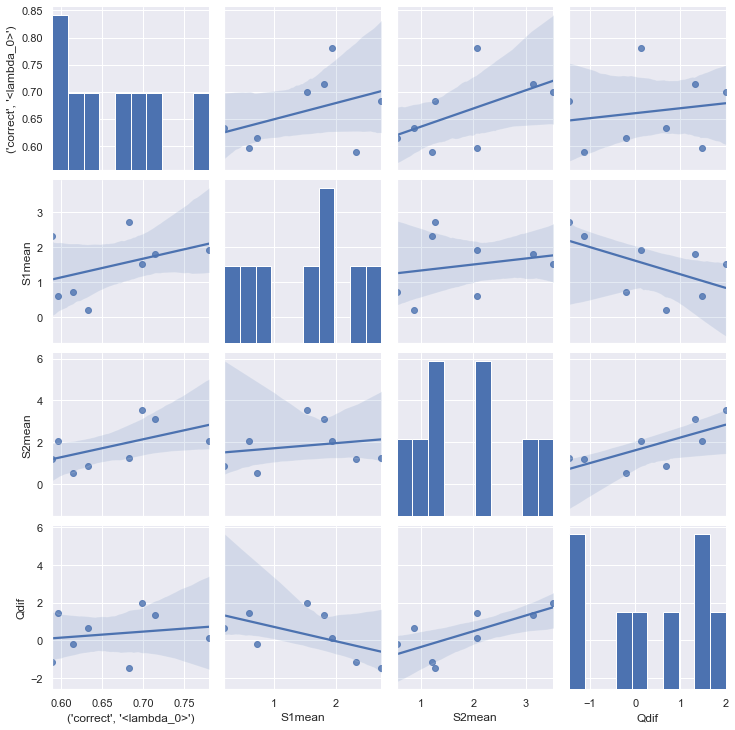

In [86]:
sns.pairplot(playerStat3, vars=[playerStat3.columns[8], 'S1mean', 'S2mean','Qdif'], kind='reg')